In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['class'] = wine.target
print(df.shape)
df.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
class                           178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.5 KB


In [4]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


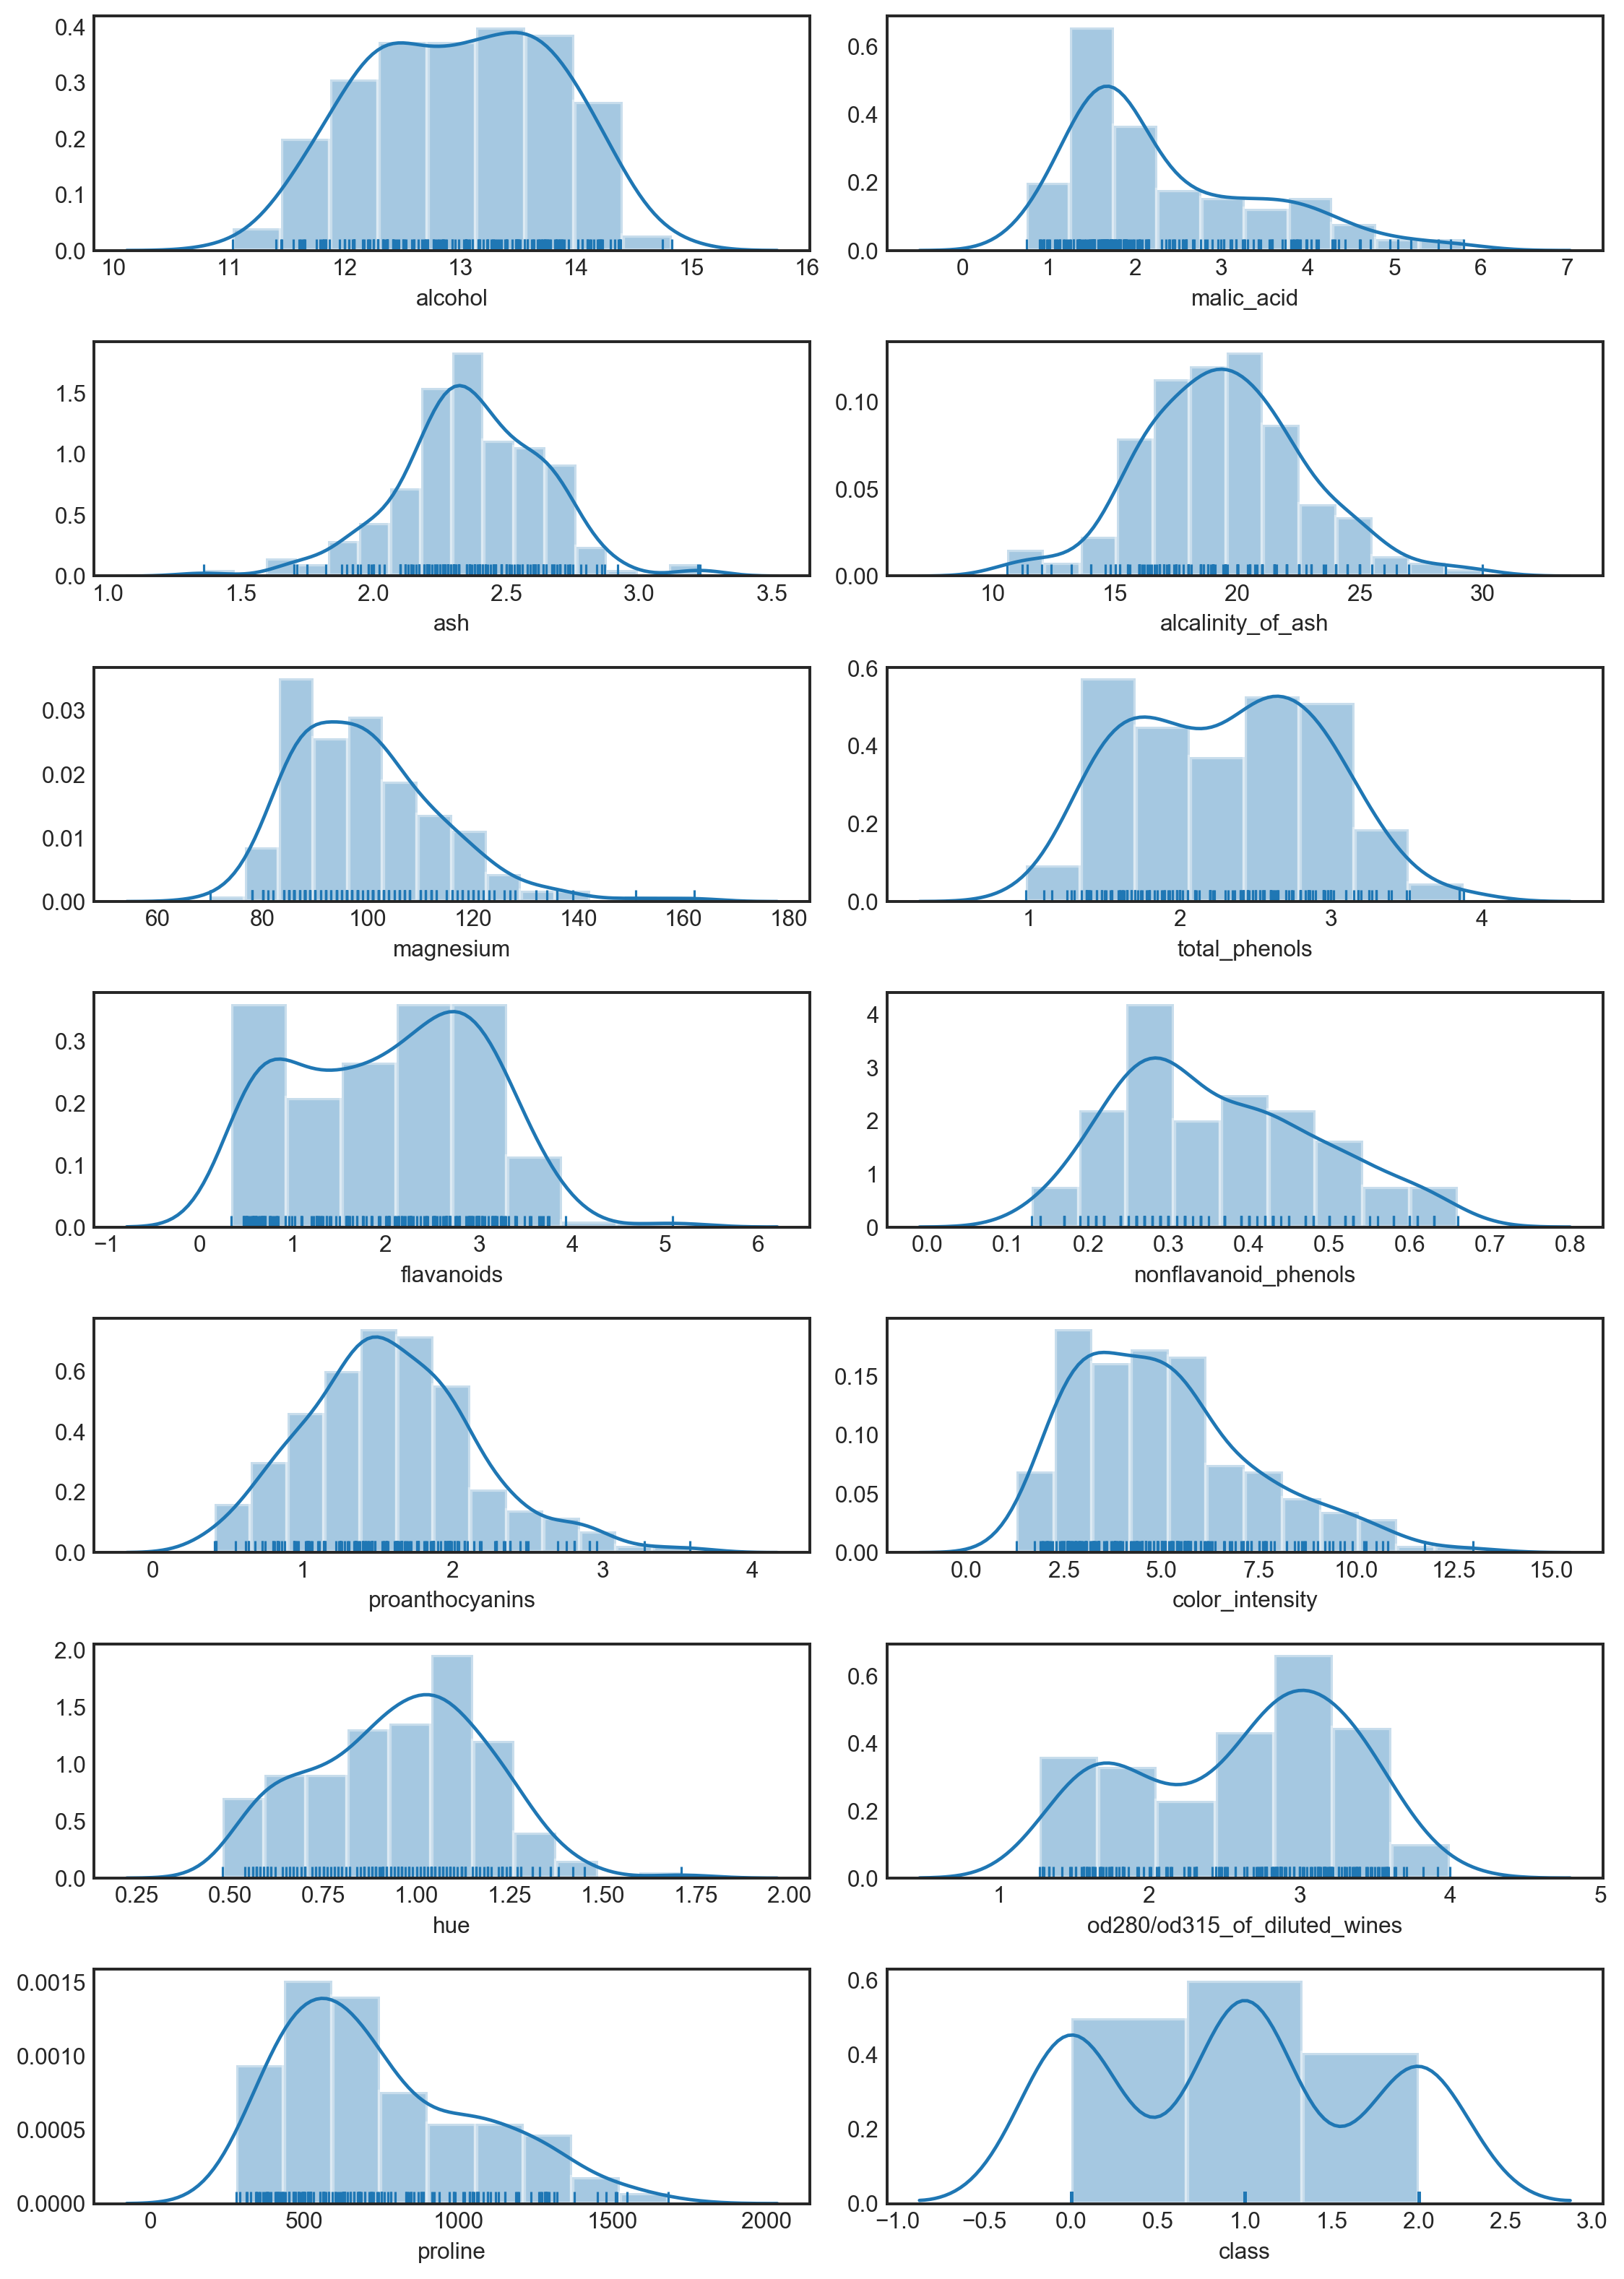

In [5]:
fig, axes = plt.subplots(7, 2, dpi=227, figsize=(10, 14))
for ax, col in zip(axes.ravel(), df.columns):
    sns.distplot(df[col], rug=True, ax=ax, hist_kws={'edgecolor': 'w', 'linewidth': 2})
plt.tight_layout()

In [6]:
X, y = load_wine(return_X_y=True)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

estimator = LogisticRegression()
print(f"CV score = {cross_val_score(estimator, X, y, cv=5, n_jobs=-1).mean():.3f}")

CV score = 0.962


(0.0, 1.0, 0.0, 1.0)

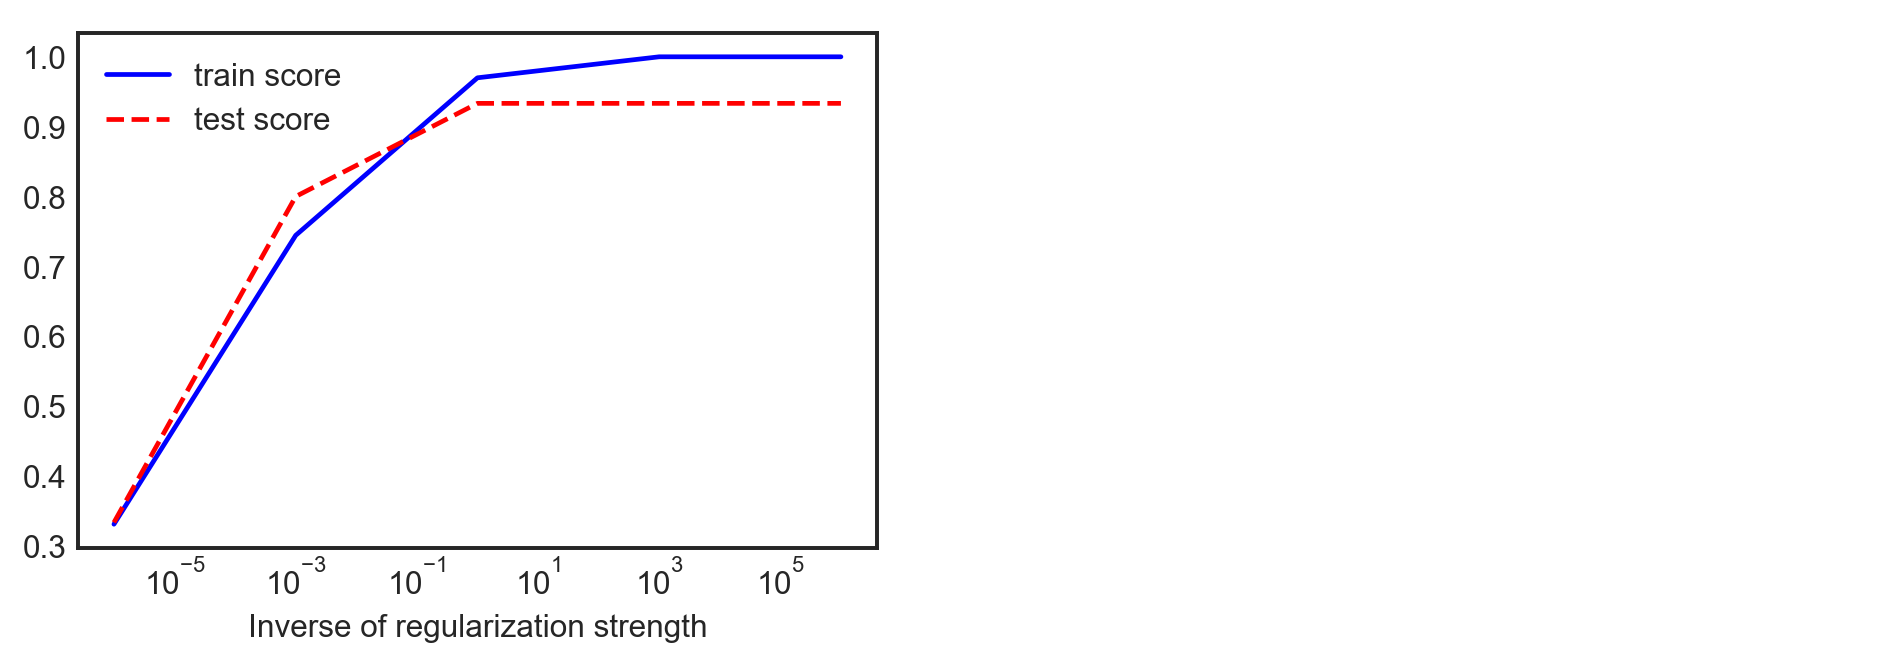

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

score_train = []
score_test = []
for C in [1e-6, 1e-3, 1, 1e3, 1e6]:
    estimator = LogisticRegression(C=C)
    estimator.fit(X_train, y_train)
    score_train.append(estimator.score(X_train, y_train))
    score_test.append(estimator.score(X_test, y_test))
    
fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 3))
axes[0].plot([1e-6, 1e-3, 1, 1e3, 1e6], score_train, 'b-', label='train score')
axes[0].plot([1e-6, 1e-3, 1, 1e3, 1e6], score_test, 'r--', label='test score')
axes[0].legend()
axes[0].set_xscale('log')
axes[0].set_xlabel('Inverse of regularization strength')
axes[1].axis('off')

### Standardizing
$$z = \frac{x - \mu}{\sigma}$$

> $\mu$ : mean   
> $\sigma$ : standard deviation

In [8]:
def standardizing(x):
    x1 = x.copy()
    for i in range(x.shape[1]):
        x1[:, i] = (x[:, i] - x[:, i].mean()) / x[:, i].std()
    return x1

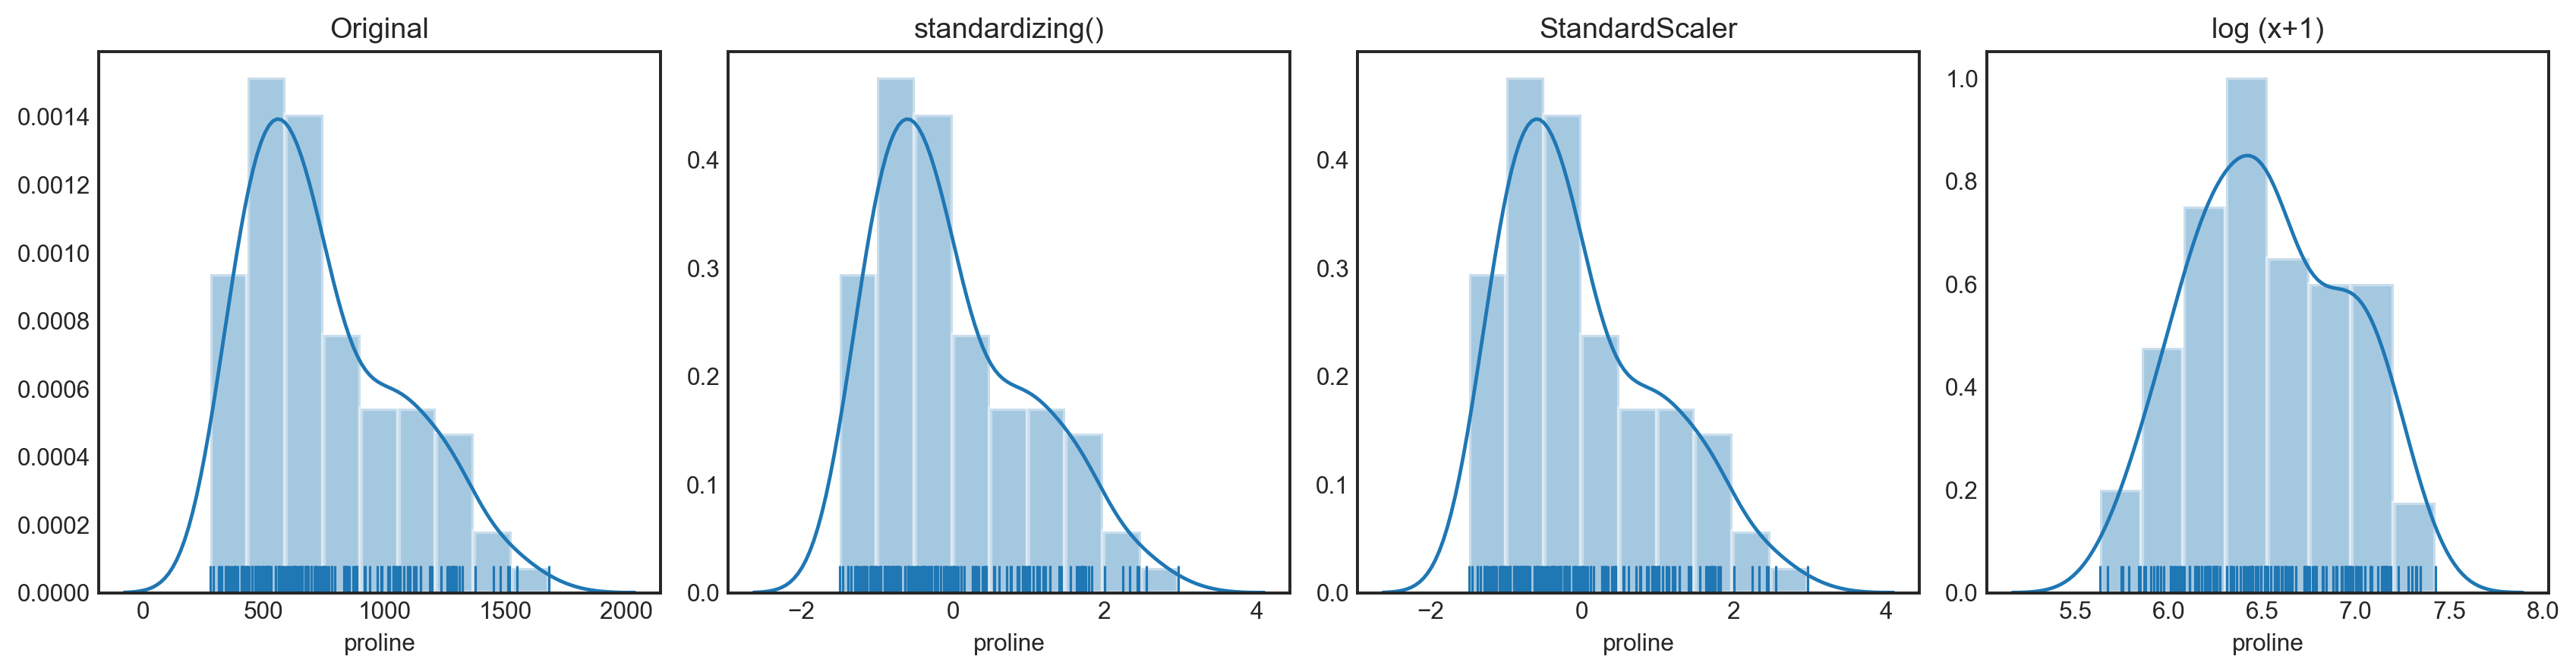

In [9]:
fig, axes = plt.subplots(1, 4, dpi=227, figsize=(15, 4))
sns.distplot(df['proline'], rug=True, ax=axes[0], hist_kws={'edgecolor': 'w', 'linewidth': 2})
axes[0].set_title('Original')

X_sc = standardizing(X)
df_temp = pd.DataFrame(X_sc, columns=wine.feature_names)
sns.distplot(df_temp['proline'], rug=True, ax=axes[1], hist_kws={'edgecolor': 'w', 'linewidth': 2})
axes[1].set_title('standardizing()')

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
df_temp = pd.DataFrame(X_sc, columns=wine.feature_names)
sns.distplot(df_temp['proline'], rug=True, ax=axes[2], hist_kws={'edgecolor': 'w', 'linewidth': 2})
axes[2].set_title('StandardScaler')
sns.distplot(np.log1p(df['proline']), rug=True, ax=axes[3], hist_kws={'edgecolor': 'w', 'linewidth': 2})
axes[3].set_title('log (x+1)')
plt.tight_layout()

(0.0, 1.0, 0.0, 1.0)

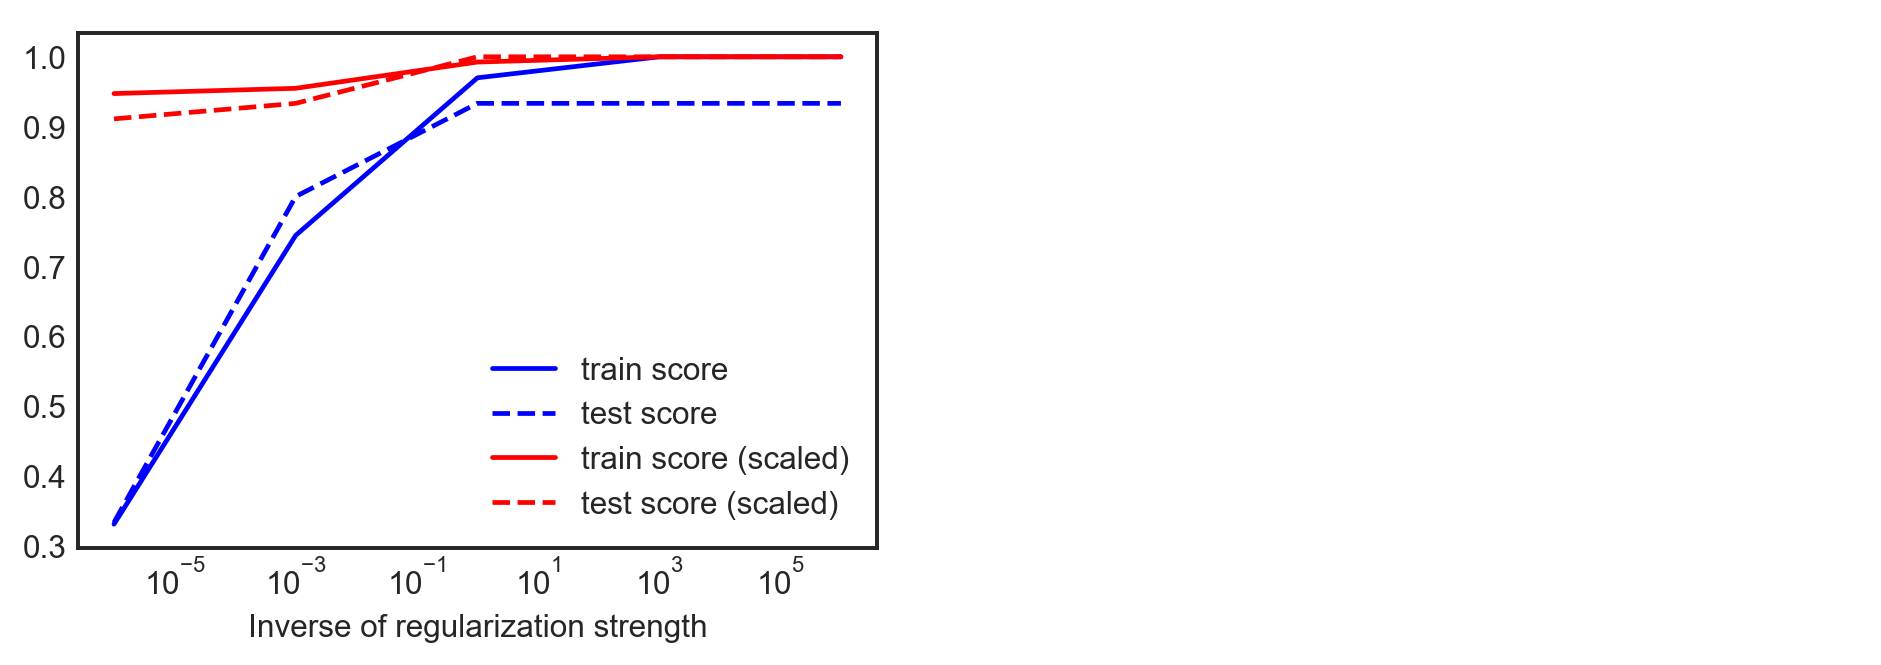

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, stratify=y, random_state=0)

score_train_sc = []
score_test_sc = []
for C in [1e-6, 1e-3, 1, 1e3, 1e6]:
    estimator = LogisticRegression(C=C)
    estimator.fit(X_train, y_train)
    score_train_sc.append(estimator.score(X_train, y_train))
    score_test_sc.append(estimator.score(X_test, y_test))
    
fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 3))
axes[0].plot([1e-6, 1e-3, 1, 1e3, 1e6], score_train, 'b-', label='train score')
axes[0].plot([1e-6, 1e-3, 1, 1e3, 1e6], score_test, 'b--', label='test score')
axes[0].plot([1e-6, 1e-3, 1, 1e3, 1e6], score_train_sc, 'r-', label='train score (scaled)')
axes[0].plot([1e-6, 1e-3, 1, 1e3, 1e6], score_test_sc, 'r--', label='test score (scaled)')
axes[0].legend()
axes[0].set_xscale('log')
axes[0].set_xlabel('Inverse of regularization strength')
axes[1].axis('off')

In [11]:
%timeit standardizing(X)

455 µs ± 13.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
%timeit sc.fit_transform(X)

296 µs ± 18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
